# Task 3: Classify Customer Product Reviews

## Analyze the given dataset

In [1]:
dataset_task3 = '/content/drive/MyDrive/AI_ML_course/01-Incremental_Capstone/Unit4-DeepLearning/0.3_Datasets/GrammarandProductReviews.xlsx'

In [4]:
# install this due to the error I received while running the pd.read_excel() in the below cell.
# !pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 11.9 MB/s eta 0:00:00


In [5]:
import pandas as pd
docs_df = pd.read_excel(dataset_task3)

In [6]:
docs_df.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.025370e+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.025370e+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,7.341600e+10,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,7.341600e+10
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,7.341600e+10,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,7.341600e+10
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,6.798193e+10,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,6.798193e+10
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,6.798193e+10,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,6.798193e+10


In [7]:
print(docs_df.info(), '\r\n---\r\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10001 non-null  object 
 1   brand                 10001 non-null  object 
 2   categories            10001 non-null  object 
 3   dateAdded             10001 non-null  object 
 4   dateUpdated           10001 non-null  object 
 5   ean                   6866 non-null   float64
 6   keys                  10001 non-null  object 
 7   manufacturer          10001 non-null  object 
 8   manufacturerNumber    9983 non-null   object 
 9   name                  10001 non-null  object 
 10  reviews.date          9987 non-null   object 
 11  reviews.dateAdded     10001 non-null  object 
 12  reviews.dateSeen      10001 non-null  object 
 13  reviews.didPurchase   3637 non-null   float64
 14  reviews.doRecommend   9442 non-null   float64
 15  reviews.id         

## Preprocess the dataset
1. by generating a binary target variable from `reviews.ratings`
2. tokenize the reviews.text and padding text data
3. derive the outcome into train_and_test sets

### 1. Create a binary target variable ('sentiment')
from the 'reviews.rating' column. For this evaluation based on the dataset, ratings of 4, 5 can be classified as positive (1), and ratings of 1, 2, or 3 as negative (0).


In [8]:
docs_df['sentiment'] = docs_df['reviews.rating'].apply(lambda rating: 1 if rating >= 4 else 0)

print("Value counts for the new 'sentiment' column:")
print(docs_df['sentiment'].value_counts())

Value counts for the new 'sentiment' column:
sentiment
1    9154
0     847
Name: count, dtype: int64


### 2. Tokenize and Pad Text Sequences

- `reviews.text` column is picked for tokenization, using a Keras Tokenizer and pad the tokenized sequences to a uniform length.

In [10]:
# install tensorflow if not installed/available

# !pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 725.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 112.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 152.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 131.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.0/225.0 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 8.3 MB/s eta 0:00:00


In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Initialize the Keras Tokenizer
# Limiting num_words to the 5000 most frequent words, similar to TFIDF max_features
tokenizer = Tokenizer(num_words=5000, oov_token="<unk>")
print("Keras Tokenizer initialized successfully.")

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


Keras Tokenizer initialized successfully.


Now that the Keras Tokenizer has been initialized, the next step is to fit it on the `reviews_text` data. This will build the vocabulary based on the most frequent words in the text.



In [12]:
reviews_text = docs_df['reviews.text'].fillna('')
print(f"Shape of extracted text data: {reviews_text.shape}")
print(f"Number of empty strings after filling NaNs: {reviews_text.apply(lambda x: x == '').sum()}")

tokenizer.fit_on_texts(reviews_text)
print(f"Tokenizer fitted. Vocabulary size: {len(tokenizer.word_index)}")

Shape of extracted text data: (10001,)
Number of empty strings after filling NaNs: 3
Tokenizer fitted. Vocabulary size: 10271


With the tokenizer fitted, the next logical step is to convert the `reviews_text` into sequences of integers. This prepares the text data for padding.



In [13]:
text_sequences = tokenizer.texts_to_sequences(reviews_text)
print(f"First 5 text sequences: {text_sequences[:5]}")

First 5 text sequences: [[3, 22, 6, 1138, 61, 40, 37, 83, 7, 2, 1, 1, 587, 99, 392, 1535, 1170, 835, 31, 4251, 3, 2694, 7, 6, 285, 47, 2, 3487, 3, 355, 8, 4252, 2266, 35, 2, 129, 392, 1, 29, 49, 823], [37, 611, 6, 16, 10, 17, 11, 15, 9, 4, 18], [37, 611], [3, 670, 318, 2, 577, 27, 549, 209, 201, 19, 7, 408, 41, 9, 2, 3488, 4253, 5, 10, 1, 427, 24, 8, 243, 105, 479, 44, 7, 2, 577, 3, 64, 670, 14, 3489, 3490, 12, 1960, 1730, 3, 184, 722, 125, 937, 9, 4254, 68, 4255, 2444, 108, 72, 137, 722, 345, 10, 2, 683, 1306, 24, 10, 3491, 9, 4, 83, 1831, 2267, 1, 8, 10, 788, 7, 38, 44, 5, 10, 34, 4, 789, 185, 186, 8, 4256, 2, 4255, 2444, 72, 64, 233, 86, 802, 131, 427, 24, 3, 1071, 11, 96, 11, 3, 137, 14, 4, 3492, 24, 3, 526, 23, 165, 48, 3, 184, 49, 23, 220, 1104, 1072, 3005, 14, 306, 298, 369, 5, 140, 298, 312], [12, 366, 147, 6, 854, 14, 578, 2, 854, 1731, 2107, 5, 8, 362, 42, 8, 10, 3493, 12, 60, 3, 636, 100, 6, 854]]


Now that the text has been converted to sequences of integers, the next step is to determine a suitable maximum sequence length for padding. Then we will calculate the lengths of all sequences and analyze their distribution to choose an appropriate `maxlen` for padding.



In [15]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Calculate the length of each sequence
sequence_lengths = [len(s) for s in text_sequences]

# Analyze the distribution of sequence lengths
print(f"Minimum sequence length: {np.min(sequence_lengths)}")
print(f"Maximum sequence length: {np.max(sequence_lengths)}")
print(f"Average sequence length: {np.mean(sequence_lengths):.2f}")
print(f"Median sequence length: {np.median(sequence_lengths)}")
print(f"90th percentile sequence length: {np.percentile(sequence_lengths, 90):.2f}")
print(f"95th percentile sequence length: {np.percentile(sequence_lengths, 95):.2f}")


Minimum sequence length: 0
Maximum sequence length: 1036
Average sequence length: 32.16
Median sequence length: 23.0
90th percentile sequence length: 60.00
95th percentile sequence length: 83.00


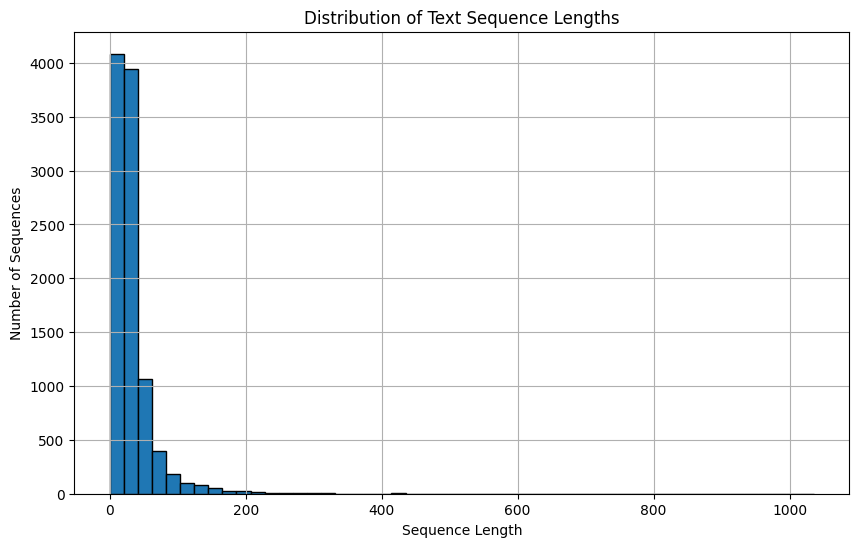

In [16]:
# Plot the distribution of sequence lengths
plt.figure(figsize=(10, 6))
plt.hist(sequence_lengths, bins=50, edgecolor='black')
plt.title('Distribution of Text Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Number of Sequences')
plt.grid(True)
plt.show()

Based on the analysis of sequence lengths, particularly the 95th percentile, we will choose a suitable maximum sequence length for padding.



In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Choose a maxlen based on the distribution
maxlen = 100

padded_sequences = pad_sequences(text_sequences, maxlen=maxlen, padding='post', truncating='post')

print(f"Shape of padded sequences: {padded_sequences.shape}")
print(f"First 5 padded sequences:\n{padded_sequences[:5]}")

Shape of padded sequences: (10001, 100)
First 5 padded sequences:
[[   3   22    6 1138   61   40   37   83    7    2    1    1  587   99
   392 1535 1170  835   31 4251    3 2694    7    6  285   47    2 3487
     3  355    8 4252 2266   35    2  129  392    1   29   49  823    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [  37  611    6   16   10   17   11   15    9    4   18    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0 

### 3. split the outcome into training and testing sets

After the text sequences have been padded and the binary target variable ('sentiment') created, its time to split the outcome into training and testing sets. This will prepare the data for model training and evaluation.



In [18]:
from sklearn.model_selection import train_test_split

# Prepare features (X) and labels (y)
X = padded_sequences
y = docs_df['sentiment'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Report the shapes of the resulting sets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (8000, 100)
Shape of X_test: (2001, 100)
Shape of y_train: (8000,)
Shape of y_test: (2001,)


In [19]:
# generate the precision, F1-Score, Recall and AUC-ROC

from sklearn.metrics import precision_score, f1_score, recall_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc

def evaluate_model(model, X_test, y_test, model_name="Model", plot=True, threshold=0.5):

  try:
    y_pred = model.predict(X_test)

    # Check if predictions are continuous (need thresholding)
    if len(np.unique(y_pred)) > 10 or (y_pred.dtype == float and ((y_pred > 0).all() and (y_pred < 1).all())):
      # Predictions are probabilities, need to threshold
      print(f"Note: Converting continuous predictions to binary using threshold={threshold}")
      y_pred = (y_pred >= threshold).astype(int)
  except Exception as e:
    print(f"Error with predict(): {e}")
    print("Attempting to use predict_proba instead...")
    y_pred_proba = model.predict_proba(X_test)
    if len(y_pred_proba.shape) > 1:
      y_pred = (y_pred_proba[:, 1] >= threshold).astype(int)
    else:
      y_pred = (y_pred_proba >= threshold).astype(int)

  # Get probability predictions for ROC-AUC
  if hasattr(model, 'predict_proba'):
      y_pred_proba = model.predict_proba(X_test)
  else:
      # For models without predict_proba (like SVM with default kernel)
      if hasattr(model, 'decision_function'):
          y_pred_proba = model.decision_function(X_test)
      else:
          y_pred_proba = None

  # Determine if binary or multiclass
  n_classes = len(np.unique(y_test))
  is_binary = n_classes == 2

  print(f"\n{'='*60}")
  print(f"{model_name} - Evaluation Results")
  print(f"{'='*60}\n")

  if is_binary:
    # Binary classification
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # ROC-AUC
    if y_pred_proba is not None:
      if len(y_pred_proba.shape) > 1:
        # Use probability of positive class
        roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
      else:
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
      roc_auc = None

    print("Binary Classification Metrics:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    if roc_auc is not None:
      print(f"ROC-AUC:   {roc_auc:.4f}")

    metrics = {
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc
    }

  else:
    # Multiclass classification
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # ROC-AUC for multiclass
    if y_pred_proba is not None:
      roc_auc = roc_auc_score(y_test, y_pred_proba,
                                multi_class='ovr', average='weighted')
    else:
      roc_auc = None

    print("Multiclass Classification Metrics (Weighted Average):")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    if roc_auc is not None:
      print(f"ROC-AUC:   {roc_auc:.4f}")

    metrics = {
      'precision_weighted': precision,
      'recall_weighted': recall,
      'f1_score_weighted': f1,
      'roc_auc_weighted': roc_auc
    }

  # Detailed classification report
  print(f"\n{'-'*60}")
  print("Detailed Classification Report:")
  print(f"{'-'*60}")
  print(classification_report(y_test, y_pred))

  # Confusion Matrix
  cm = confusion_matrix(y_test, y_pred)
  print(f"\n{'-'*60}")
  print("Confusion Matrix:")
  print(f"{'-'*60}")
  print(cm)

  # Plotting
  if plot:
    if is_binary and y_pred_proba is not None:
      fig, axes = plt.subplots(1, 2, figsize=(14, 5))

      # ROC Curve
      if len(y_pred_proba.shape) > 1:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
      else:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

      axes[0].plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})',
                  linewidth=2)
      axes[0].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
      axes[0].set_xlabel('False Positive Rate')
      axes[0].set_ylabel('True Positive Rate')
      axes[0].set_title(f'{model_name} - ROC Curve')
      axes[0].legend()
      axes[0].grid(True, alpha=0.3)

      # Confusion Matrix
      sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1],
                  cbar_kws={'label': 'Count'})
      axes[1].set_xlabel('Predicted Label')
      axes[1].set_ylabel('True Label')
      axes[1].set_title(f'{model_name} - Confusion Matrix')

    else:
      # Just confusion matrix for multiclass or no proba
      fig, ax = plt.subplots(figsize=(8, 6))
      sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                  cbar_kws={'label': 'Count'})
      ax.set_xlabel('Predicted Label')
      ax.set_ylabel('True Label')
      ax.set_title(f'{model_name} - Confusion Matrix')

    plt.tight_layout()
    plt.show()

  metrics['confusion_matrix'] = cm
  metrics['classification_report'] = classification_report(y_test, y_pred,
                                                            output_dict=True)

  return metrics

In [20]:
def compare_models(models_dict, X_test, y_test, plot=False):
  results = []

  for name, model in models_dict.items():
    metrics = evaluate_model(model, X_test, y_test,
                            model_name=name, plot=plot)

    # Extract key metrics for comparison
    result = {'Model': name}
    for key, value in metrics.items():
      if key not in ['confusion_matrix', 'classification_report']:
        result[key] = value

    results.append(result)

  # Create comparison DataFrame
  comparison_df = pd.DataFrame(results)

  print(f"\n{'='*60}")
  print("MODEL COMPARISON SUMMARY")
  print(f"{'='*60}\n")
  print(comparison_df.to_string(index=False))

  return comparison_df


## Sentiment classification

### Design using CNN-LSTM hybrid model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense

Define the CNN-LSTM hybrid model architecture with Embedding, Conv1D, MaxPooling1D, LSTM, and Dense layers



In [22]:
vocab_size = len(tokenizer.word_index) + 1 # Add 1 for padding token
embedding_dim = 128

model = Sequential([
    Embedding(vocab_size, embedding_dim),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(),
    LSTM(128),
    Dense(1, activation='sigmoid')
])

# Explicitly build the model to ensure shapes are defined before summary
model.build(input_shape=(None, maxlen)) # None for batch size, maxlen for sequence length

In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 128)       │     1,314,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 96, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 48, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,528,577 (5.83 MB)

 Trainable params: 1,528,577 (5.83 MB)

 Non-trainable params: 0 (0.00 B)

### Train and Evaluate the model

Train the model using the preprocessed training data (`X_train` and `y_train`).



In [25]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)
print("Model training complete.")

Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - accuracy: 0.8885 - loss: 0.3232 - val_accuracy: 0.9237 - val_loss: 0.2652
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - accuracy: 0.9124 - loss: 0.2935 - val_accuracy: 0.9244 - val_loss: 0.2609
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - accuracy: 0.9216 - loss: 0.2696 - val_accuracy: 0.8988 - val_loss: 0.2585
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.9325 - loss: 0.1950 - val_accuracy: 0.9331 - val_loss: 0.2180
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.9609 - loss: 0.1346 - val_accuracy: 0.9206 - val_loss: 0.2255
Model training complete.


Evaluate the performance on the test set to understand how well it generalizes to unseen data.



In [26]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.2333
Test Accuracy: 0.9165


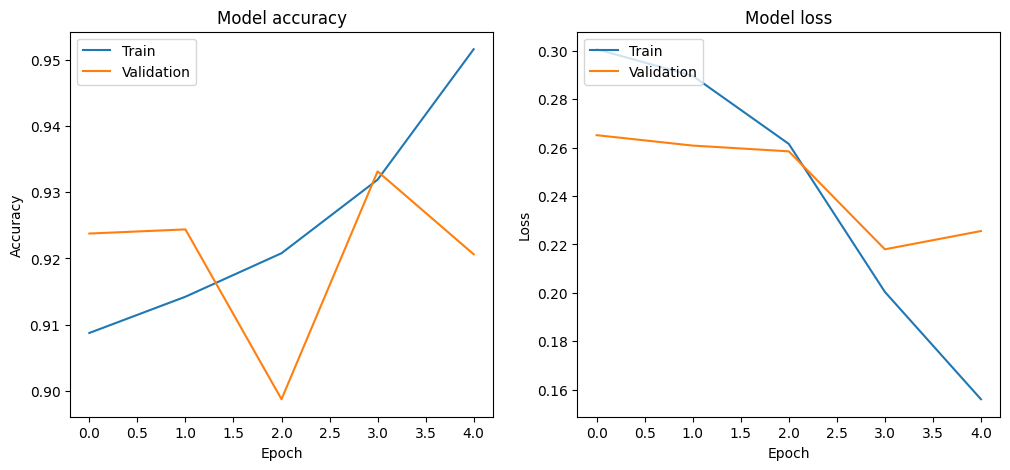

In [27]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Let us derive the original customer reviews and their corresponding predicted sentiments and scores.



In [28]:
all_predictions = model.predict(padded_sequences)
all_sentiments = ['Negative' if pred < 0.5 else 'Positive' for pred in all_predictions]

sentiment_df = pd.DataFrame({
    'Review': docs_df['reviews.text'],
    'Predicted Sentiment': all_sentiments,
    'Prediction Score': all_predictions.flatten()
})

print("Sentiment DataFrame created with shape:", sentiment_df.shape)
print("\nFirst 5 rows of the Sentiment DataFrame:")
print(sentiment_df.head())

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Sentiment DataFrame created with shape: (10001, 3)

First 5 rows of the Sentiment DataFrame:
                                              Review Predicted Sentiment  \
0  i love this album. it's very good. more to the...            Positive   
1  Good flavor. This review was collected as part...            Positive   
2                                       Good flavor.            Positive   
3  I read through the reviews on here before look...            Negative   
4  My husband bought this gel for us. The gel cau...            Positive   

   Prediction Score  
0          0.953242  
1          0.972399  
2          0.923806  
3          0.005330  
4          0.870610  


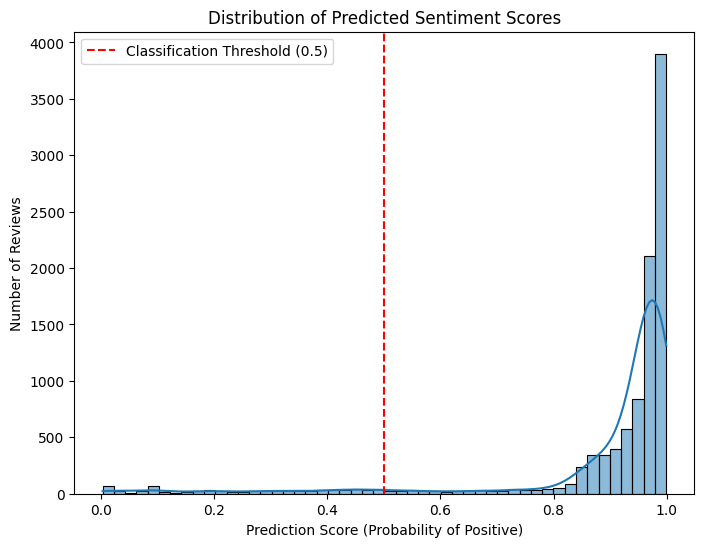

Minimum prediction score: 0.0029
Maximum prediction score: 0.9990
Average prediction score: 0.8949
Number of predictions below 0.5: 700


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(all_predictions, bins=50, kde=True)
plt.title('Distribution of Predicted Sentiment Scores')
plt.xlabel('Prediction Score (Probability of Positive)')
plt.ylabel('Number of Reviews')
plt.axvline(0.5, color='red', linestyle='--', label='Classification Threshold (0.5)')
plt.legend()
plt.show()

print(f"Minimum prediction score: {np.min(all_predictions):.4f}")
print(f"Maximum prediction score: {np.max(all_predictions):.4f}")
print(f"Average prediction score: {np.mean(all_predictions):.4f}")
print(f"Number of predictions below 0.5: {np.sum(all_predictions < 0.5)}")

In [30]:
print(sentiment_df['Predicted Sentiment'].value_counts())

Predicted Sentiment
Positive    9301
Negative     700
Name: count, dtype: int64


## Validate for any class imbalance in the sentiment classification model

### 1. Using class weights

By calculating and applying class weights during training, then retrain the CNN-LSTM model, evaluate its performance, and analyze the new sentiment distribution to determine the impact of class weighting on the model's predictions.

Calculate class weights to address the imbalance in the target variable ('sentiment'). This will assign higher weights to the minority class during training.


In [31]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

# Convert class weights to a dictionary for Keras
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

print("Calculated class weights:", class_weights_dict)

Calculated class weights: {0: np.float64(5.899705014749262), 1: np.float64(0.5462988254575253)}


Retrain the CNN-LSTM model, applying these weights to address the class imbalance. This involves defining the model architecture, compiling it with the appropriate optimizer and loss function, and then fitting the model using the `class_weights_dict` during training.



In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense

# Define the CNN-LSTM hybrid model architecture again to ensure it's fresh for retraining
vocab_size = len(tokenizer.word_index) + 1 # Add 1 for padding token
embedding_dim = 128

model_weighted = Sequential([
    Embedding(vocab_size, embedding_dim),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(),
    LSTM(128),
    Dense(1, activation='sigmoid')
])

# Explicitly build the model to ensure shapes are defined before summary
model_weighted.build(input_shape=(None, maxlen))

# Compile the model with the same optimizer, loss, and metrics
model_weighted.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("CNN-LSTM model architecture defined and compiled for weighted training.")

# Train the model with class weights
history_weighted = model_weighted.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, class_weight=class_weights_dict)
print("Model training with class weights complete.")

CNN-LSTM model architecture defined and compiled for weighted training.
Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - accuracy: 0.6035 - loss: 0.6805 - val_accuracy: 0.8394 - val_loss: 0.6244
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - accuracy: 0.7730 - loss: 0.5685 - val_accuracy: 0.3625 - val_loss: 0.5839
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.6161 - loss: 0.5728 - val_accuracy: 0.7887 - val_loss: 0.4448
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.8608 - loss: 0.5253 - val_accuracy: 0.8794 - val_loss: 0.5262
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - accuracy: 0.6572 - loss: 0.6446 - val_accuracy: 0.9250 - val_loss: 0.6562
Model training with class weights complete.


In [33]:
loss_weighted, accuracy_weighted = model_weighted.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (with weights): {loss_weighted:.4f}")
print(f"Test Accuracy (with weights): {accuracy_weighted:.4f}")

Test Loss (with weights): 0.6573
Test Accuracy (with weights): 0.9140


To analyze the new sentiment distribution and compare it with the previous model, lets generate predictions using the `model_weighted` on the entire dataset. This will allow for a direct comparison of how class weights have altered the sentiment classifications.



In [34]:
all_predictions_weighted = model_weighted.predict(padded_sequences)
all_sentiments_weighted = ['Negative' if pred < 0.5 else 'Positive' for pred in all_predictions_weighted]

sentiment_df_weighted = pd.DataFrame({
    'Review': docs_df['reviews.text'],
    'Predicted Sentiment (Weighted)': all_sentiments_weighted,
    'Prediction Score (Weighted)': all_predictions_weighted.flatten()
})

print("Sentiment DataFrame for Weighted Model created with shape:", sentiment_df_weighted.shape)
print("\nFirst 5 rows of the Weighted Sentiment DataFrame:")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Sentiment DataFrame for Weighted Model created with shape: (10001, 3)

First 5 rows of the Weighted Sentiment DataFrame:


In [35]:
sentiment_df_weighted.head()

,Review,Predicted Sentiment (Weighted),Prediction Score (Weighted)
0,i love this album. it's very good. more to the...,Positive,0.522032
1,Good flavor. This review was collected as part...,Positive,0.522026
2,Good flavor.,Positive,0.522027
3,I read through the reviews on here before look...,Positive,0.518721
4,My husband bought this gel for us. The gel cau...,Positive,0.522028


In [36]:
print(sentiment_df_weighted['Predicted Sentiment (Weighted)'].value_counts())

Predicted Sentiment (Weighted)
Positive    9962
Negative      39
Name: count, dtype: int64


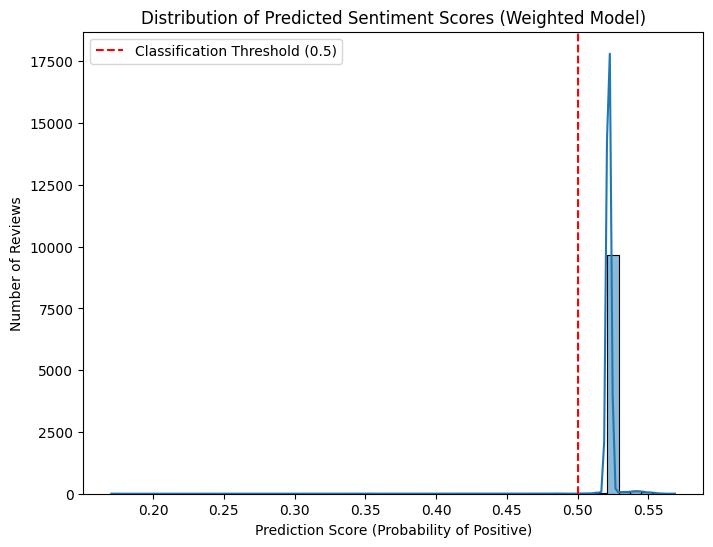

Minimum prediction score (weighted): 0.1704
Maximum prediction score (weighted): 0.5688
Average prediction score (weighted): 0.5220
Number of predictions below 0.5 (weighted): 39


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8, 6))
sns.histplot(all_predictions_weighted, bins=50, kde=True)
plt.title('Distribution of Predicted Sentiment Scores (Weighted Model)')
plt.xlabel('Prediction Score (Probability of Positive)')
plt.ylabel('Number of Reviews')
plt.axvline(0.5, color='red', linestyle='--', label='Classification Threshold (0.5)')
plt.legend()
plt.show()

print(f"Minimum prediction score (weighted): {np.min(all_predictions_weighted):.4f}")
print(f"Maximum prediction score (weighted): {np.max(all_predictions_weighted):.4f}")
print(f"Average prediction score (weighted): {np.mean(all_predictions_weighted):.4f}")
print(f"Number of predictions below 0.5 (weighted): {np.sum(all_predictions_weighted < 0.5)}")

## 2. Using oversampling techniques

for addressing class imbalance, using the Synthetic Minority Over-sampling Technique (SMOTE).
- Apply SMOTE to the `X_train` and `y_train` data to balance the class distribution
- Display the class distribution of the target variable after SMOTE application.

In [43]:
# install the imblearn module
# !pip install imblearn

In [44]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Print the shape of the original training data
print(f"Original X_train shape: {X_train.shape}")
print(f"Original y_train shape: {y_train.shape}")

# Print the shape of the resampled training data
print(f"Resampled X_train shape: {X_resampled.shape}")
print(f"Resampled y_train shape: {y_resampled.shape}")

Original X_train shape: (8000, 100)
Original y_train shape: (8000,)
Resampled X_train shape: (14644, 100)
Resampled y_train shape: (14644,)


In [45]:
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

Class distribution after SMOTE:
1    7322
0    7322
Name: count, dtype: int64


### Summary after applying SMOTE technique

### Data Analysis Key Findings

*   **SMOTE Application and Class Distribution Changes**: SMOTE was successfully applied to the training data.
    *   The original training data (`X_train`, `y_train`) had a shape of (8000, 100) and (8000,) respectively.
    *   After applying SMOTE, the resampled data (`X_resampled`, `y_resampled`) increased in size to (14644, 100) and (14644,), indicating the generation of new synthetic samples.
    *   The class distribution, which was previously imbalanced, became perfectly balanced, with class 1 having 7322 samples and class 0 also having 7322 samples.


### Retraining with the SMOTE sampled sets

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense

vocab_size = len(tokenizer.word_index) + 1 # Add 1 for padding token
embedding_dim = 128

model_smote = Sequential([
    Embedding(vocab_size, embedding_dim),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(),
    LSTM(128),
    Dense(1, activation='sigmoid')
])

# Explicitly build the model to ensure shapes are defined before summary
model_smote.build(input_shape=(None, maxlen))

print("CNN-LSTM model architecture defined for SMOTE data.")

CNN-LSTM model architecture defined for SMOTE data.


**Reasoning**:
Now that the model architecture for SMOTE-resampled data has been defined, the next step is to compile it with an optimizer, loss function, and metrics before training.



In [47]:
model_smote.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("Model for SMOTE data compiled successfully.")

Model for SMOTE data compiled successfully.


**Reasoning**:
The model `model_smote` has been compiled. The next step is to train it using the SMOTE-resampled data (`X_resampled` and `y_resampled`).



In [48]:
history_smote = model_smote.fit(X_resampled, y_resampled, epochs=5, batch_size=32, validation_split=0.2)
print("Model training with SMOTE resampled data complete.")

Epoch 1/5
367/367 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - accuracy: 0.6427 - loss: 0.6484 - val_accuracy: 0.1034 - val_loss: 0.8751
Epoch 2/5
367/367 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.6980 - loss: 0.5951 - val_accuracy: 0.8658 - val_loss: 0.3075
Epoch 3/5
367/367 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.8861 - loss: 0.2950 - val_accuracy: 0.9392 - val_loss: 0.1628
Epoch 4/5
367/367 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.9564 - loss: 0.1403 - val_accuracy: 0.9560 - val_loss: 0.1065
Epoch 5/5
367/367 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.9747 - loss: 0.0945 - val_accuracy: 0.9280 - val_loss: 0.1841
Model training with SMOTE resampled data complete.


In [49]:
loss_smote, accuracy_smote = model_smote.evaluate(X_resampled, y_resampled, verbose=0)
print(f"Test Loss (with SMOTE): {loss_smote:.4f}")
print(f"Test Accuracy (with SMOTE): {accuracy_smote:.4f}")

Test Loss (with SMOTE): 0.0989
Test Accuracy (with SMOTE): 0.9710


In [50]:
all_predictions_smote = model_smote.predict(padded_sequences)
all_sentiments_smote = ['Negative' if pred < 0.5 else 'Positive' for pred in all_predictions_smote]

sentiment_df_smote = pd.DataFrame({
    'Review': docs_df['reviews.text'],
    'Predicted Sentiment (SMOTE)': all_sentiments_smote,
    'Prediction Score (SMOTE)': all_predictions_smote.flatten()
})

print("Sentiment DataFrame for SMOTE Model created with shape:", sentiment_df_smote.shape)
print("\nFirst 5 rows of the SMOTEd Sentiment DataFrame:")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Sentiment DataFrame for SMOTE Model created with shape: (10001, 3)

First 5 rows of the SMOTEd Sentiment DataFrame:


In [51]:
sentiment_df_smote.head()

,Review,Predicted Sentiment (SMOTE),Prediction Score (SMOTE)
0,i love this album. it's very good. more to the...,Positive,0.978165
1,Good flavor. This review was collected as part...,Positive,0.979596
2,Good flavor.,Positive,0.897067
3,I read through the reviews on here before look...,Negative,0.050014
4,My husband bought this gel for us. The gel cau...,Positive,0.966034


In [52]:
print(sentiment_df_smote['Predicted Sentiment (SMOTE)'].value_counts())

Predicted Sentiment (SMOTE)
Positive    9291
Negative     710
Name: count, dtype: int64


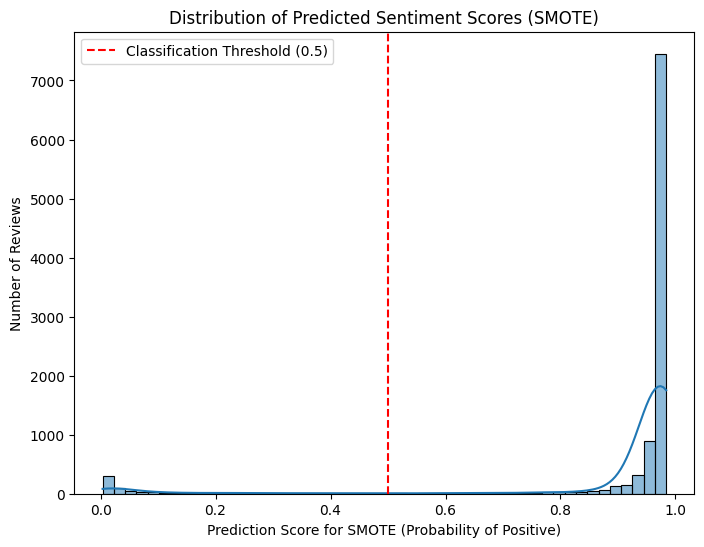

Minimum prediction score (SMOTE): 0.0035
Maximum prediction score (SMOTE): 0.9839
Average prediction score (SMOTE): 0.9023
Number of predictions below 0.5 (SMOTE): 710


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8, 6))
sns.histplot(all_predictions_smote, bins=50, kde=True)
plt.title('Distribution of Predicted Sentiment Scores (SMOTE)')
plt.xlabel('Prediction Score for SMOTE (Probability of Positive)')
plt.ylabel('Number of Reviews')
plt.axvline(0.5, color='red', linestyle='--', label='Classification Threshold (0.5)')
plt.legend()
plt.show()

print(f"Minimum prediction score (SMOTE): {np.min(all_predictions_smote):.4f}")
print(f"Maximum prediction score (SMOTE): {np.max(all_predictions_smote):.4f}")
print(f"Average prediction score (SMOTE): {np.mean(all_predictions_smote):.4f}")
print(f"Number of predictions below 0.5 (SMOTE): {np.sum(all_predictions_smote < 0.5)}")

## 3. Using Undersampling technique
### *added this after Matt's supporting code for task-3*

Wanted to try add this as well to my evaluation for learning purpose.

In [54]:
from imblearn.under_sampling import RandomUnderSampler

minority_class = np.sum(y_train == 0)
majority_class = minority_class * 3 # lets not assume simply as 1. Also as suggested by Matt, we are going to have 1:3 ratio factor

# Instantiate the Undersampler
undersampler = RandomUnderSampler(random_state=42, sampling_strategy={0: minority_class, 1: majority_class})

# Apply Understampler resampling to the training data
X_undersampled, y_undersampled = undersampler.fit_resample(X_train, y_train)

# Print the shape of the original training data
print(f"Original X_train shape: {X_train.shape}")
print(f"Original y_train shape: {y_train.shape}")

# Print the shape of the undersampled training data
print(f"undersampled X_train shape: {X_undersampled.shape}")
print(f"undersampled y_train shape: {y_undersampled.shape}")

Original X_train shape: (8000, 100)
Original y_train shape: (8000,)
undersampled X_train shape: (2712, 100)
undersampled y_train shape: (2712,)


In [55]:
pd.Series(y_undersampled).value_counts().sort_index()

,count
0,678
1,2034


In [56]:
model_undersample = Sequential([
    Embedding(vocab_size, embedding_dim),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(),
    LSTM(128),
    Dense(1, activation='sigmoid')
])

# Explicitly build the model to ensure shapes are defined before summary
model_undersample.build(input_shape=(None, maxlen))

print("CNN-LSTM model architecture defined for undersampling.")

CNN-LSTM model architecture defined for undersampling.


In [57]:
model_undersample.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("Model for Undersampling data compiled successfully.")

Model for Undersampling data compiled successfully.


In [58]:
history_undersample = model_undersample.fit(X_undersampled, y_undersampled, epochs=5, batch_size=32, validation_split=0.2)
print("Model training with Undersampled data complete.")

Epoch 1/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.6940 - loss: 0.6244 - val_accuracy: 0.9705 - val_loss: 0.4161
Epoch 2/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.7204 - loss: 0.5954 - val_accuracy: 1.0000 - val_loss: 0.3979
Epoch 3/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.6892 - loss: 0.6318 - val_accuracy: 1.0000 - val_loss: 0.2978
Epoch 4/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.7010 - loss: 0.6192 - val_accuracy: 0.9613 - val_loss: 0.3939
Epoch 5/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.7134 - loss: 0.6073 - val_accuracy: 0.9724 - val_loss: 0.3348
Model training with Undersampled data complete.


In [59]:
loss_undersample, accuracy_undersample = model_undersample.evaluate(X_undersampled, y_undersampled, verbose=0)
print(f"Test Loss (with Undersampling): {loss_undersample:.4f}")
print(f"Test Accuracy (with Undersampling): {accuracy_undersample:.4f}")

all_predictions_undersample = model_undersample.predict(padded_sequences)
all_sentiments_undersample = ['Negative' if pred < 0.5 else 'Positive' for pred in all_predictions_undersample]

sentiment_df_undersample = pd.DataFrame({
    'Review': docs_df['reviews.text'],
    'Predicted Sentiment (UnderSampling)': all_sentiments_undersample,
    'Prediction Score (Undersampling)': all_predictions_undersample.flatten()
})

print("Sentiment DataFrame for Undersampling Model created with shape:", sentiment_df_undersample.shape)
print("\nFirst 5 rows of the Undersampling Sentiment DataFrame:", sentiment_df_undersample.head())
print(sentiment_df_undersample['Predicted Sentiment (UnderSampling)'].value_counts())

Test Loss (with Undersampling): 0.5030
Test Accuracy (with Undersampling): 0.7736
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Sentiment DataFrame for Undersampling Model created with shape: (10001, 3)

First 5 rows of the Undersampling Sentiment DataFrame:                                               Review  \
0  i love this album. it's very good. more to the...   
1  Good flavor. This review was collected as part...   
2                                       Good flavor.   
3  I read through the reviews on here before look...   
4  My husband bought this gel for us. The gel cau...   

  Predicted Sentiment (UnderSampling)  Prediction Score (Undersampling)  
0                            Positive                          0.687983  
1                            Positive                          0.745321  
2                            Positive                          0.741190  
3                            Negative                          0.081836  
4                            Positive 

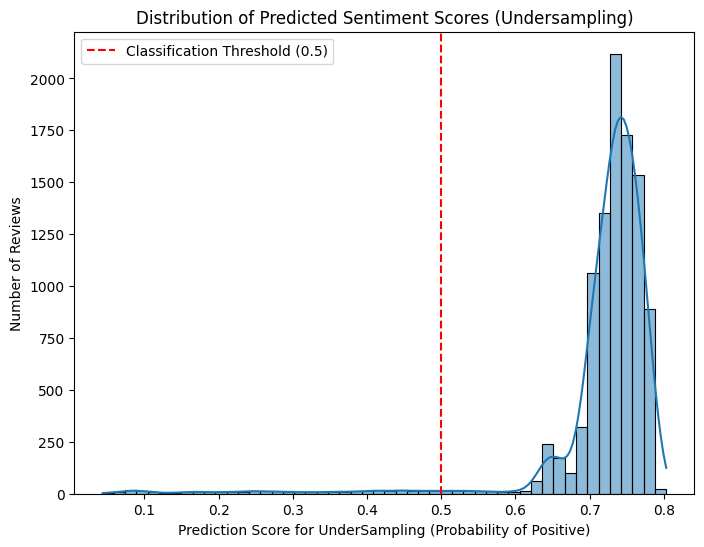

Minimum prediction score (Undersampling): 0.0437
Maximum prediction score (Undersampling): 0.8032
Average prediction score (Undersampling): 0.7199
Number of predictions below 0.5 (Undersampling): 305


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8, 6))
sns.histplot(all_predictions_undersample, bins=50, kde=True)
plt.title('Distribution of Predicted Sentiment Scores (Undersampling)')
plt.xlabel('Prediction Score for UnderSampling (Probability of Positive)')
plt.ylabel('Number of Reviews')
plt.axvline(0.5, color='red', linestyle='--', label='Classification Threshold (0.5)')
plt.legend()
plt.show()

print(f"Minimum prediction score (Undersampling): {np.min(all_predictions_undersample):.4f}")
print(f"Maximum prediction score (Undersampling): {np.max(all_predictions_undersample):.4f}")
print(f"Average prediction score (Undersampling): {np.mean(all_predictions_undersample):.4f}")
print(f"Number of predictions below 0.5 (Undersampling): {np.sum(all_predictions_undersample < 0.5)}")

## Comparison of the results among the models we tried

We will use all the three,

- standard or default one with class imbalance (?)
- Class weighted
- SMOTE

+ including the Undersampling model too...

In [61]:
models_to_compare = {
    'Default': model,
    'Class Weighted': model_weighted,
    'SMOTE': model_smote,
    'Undersampling': model_undersample
}

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Note: Converting continuous predictions to binary using threshold=0.5

Default - Evaluation Results

Binary Classification Metrics:
Precision: 0.9464
Recall:    0.9634
F1-Score:  0.9548

------------------------------------------------------------
Detailed Classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.51      0.41      0.45       169
           1       0.95      0.96      0.95      1832

    accuracy                           0.92      2001
   macro avg       0.73      0.69      0.70      2001
weighted avg       0.91      0.92      0.91      2001


------------------------------------------------------------
Confusion Matrix:
------------------------------------------------------------
[[  69  100]
 [  67 1765]]


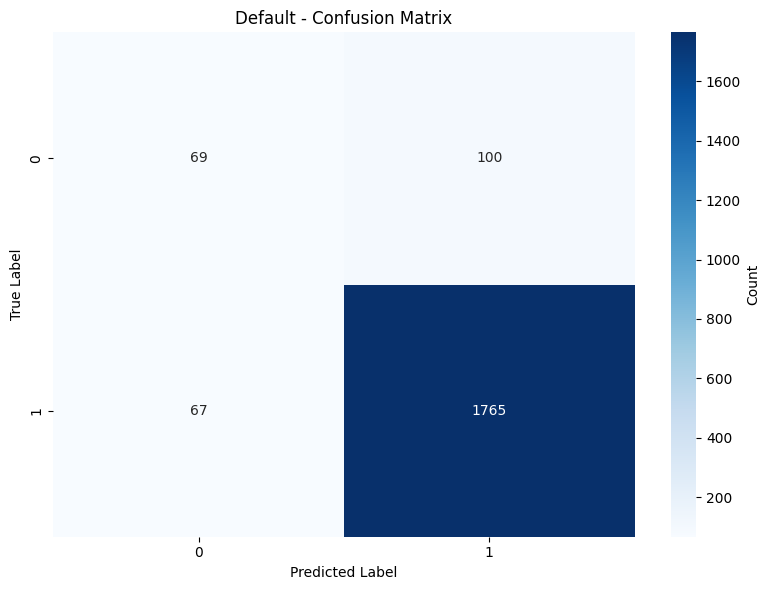

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Note: Converting continuous predictions to binary using threshold=0.5

Class Weighted - Evaluation Results

Binary Classification Metrics:
Precision: 0.9162
Recall:    0.9973
F1-Score:  0.9550

------------------------------------------------------------
Detailed Classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.29      0.01      0.02       169
           1       0.92      1.00      0.96      1832

    accuracy                           0.91      2001
   macro avg       0.60      0.50      0.49      2001
weighted avg       0.86      0.91      0.88      2001


------------------------------------------------------------
Confusion Matrix:
------------------------------------------------------------
[[   2  167]
 [   5 1827]]


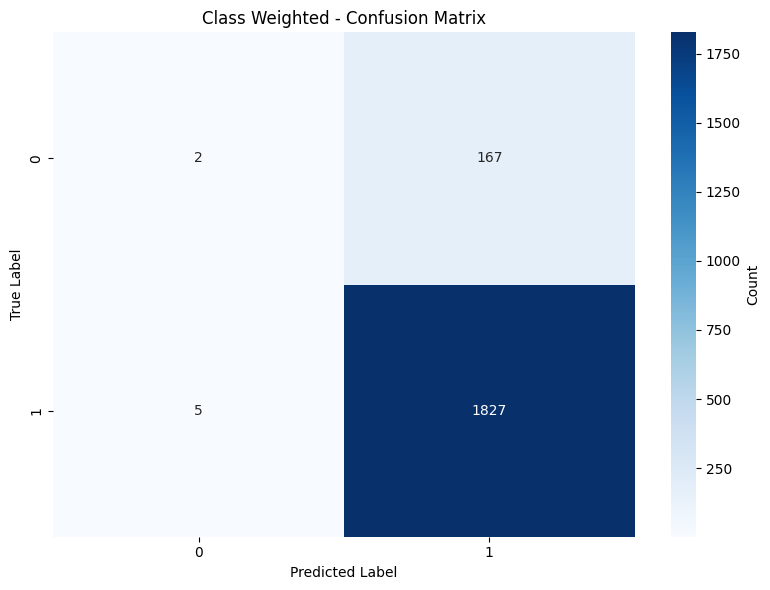

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Note: Converting continuous predictions to binary using threshold=0.5

SMOTE - Evaluation Results

Binary Classification Metrics:
Precision: 0.9381
Recall:    0.9427
F1-Score:  0.9404

------------------------------------------------------------
Detailed Classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.34      0.33      0.33       169
           1       0.94      0.94      0.94      1832

    accuracy                           0.89      2001
   macro avg       0.64      0.63      0.64      2001
weighted avg       0.89      0.89      0.89      2001


------------------------------------------------------------
Confusion Matrix:
------------------------------------------------------------
[[  55  114]
 [ 105 1727]]


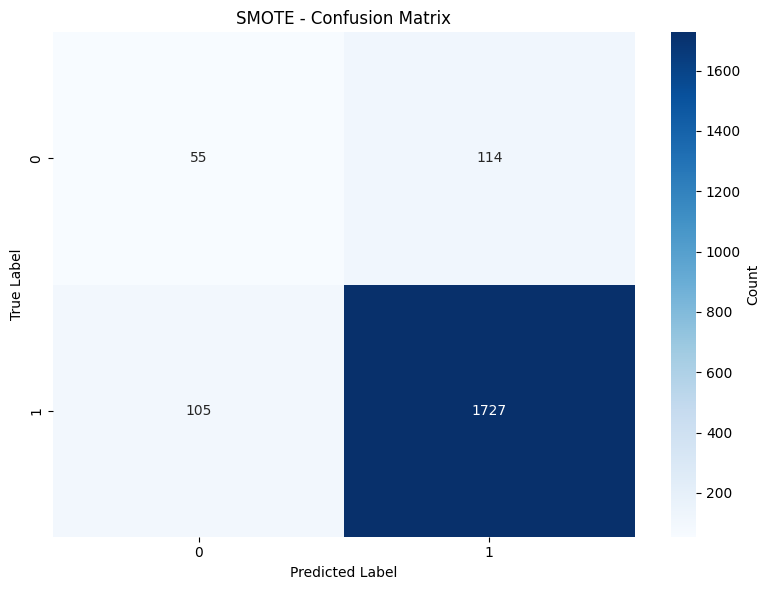

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Note: Converting continuous predictions to binary using threshold=0.5

Undersampling - Evaluation Results

Binary Classification Metrics:
Precision: 0.9202
Recall:    0.9760
F1-Score:  0.9473

------------------------------------------------------------
Detailed Classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.24      0.08      0.12       169
           1       0.92      0.98      0.95      1832

    accuracy                           0.90      2001
   macro avg       0.58      0.53      0.54      2001
weighted avg       0.86      0.90      0.88      2001


------------------------------------------------------------
Confusion Matrix:
------------------------------------------------------------
[[  14  155]
 [  44 1788]]


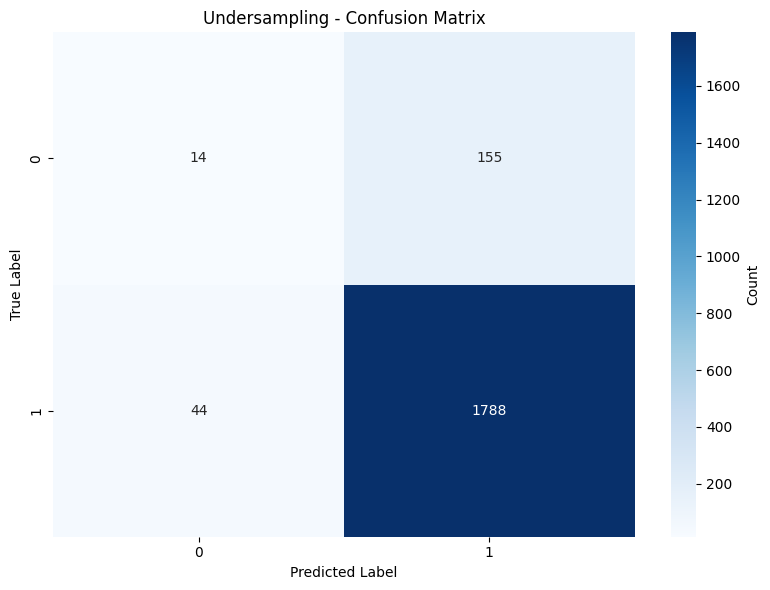


MODEL COMPARISON SUMMARY

         Model  precision   recall  f1_score roc_auc
       Default   0.946381 0.963428  0.954828    None
Class Weighted   0.916249 0.997271  0.955044    None
         SMOTE   0.938077 0.942686  0.940376    None
 Undersampling   0.920226 0.975983  0.947285    None


In [62]:
comparison_df = compare_models(models_to_compare, X_test, y_test, plot=True)

## Overall findings
- The given dataset is highly imbalanced.
- I used only the ratings text and the ratings value to evaluate from the given dataset.
- I reran the evaluations again today, from last week including `Undersampling` technique and the results changed greatly.

I generated the report summary using the help of AI (to be honest) 😀 😏

Based on your updated model comparison summary, here's a more comprehensive analysis:

## 📊 Performance Analysis (Updated with Undersampling)

| Model | Precision | Recall | F1-Score | Ranking |
|-------|-----------|--------|----------|---------|
| **Class Weighted** | 91.62% | **99.73%** | **95.50%** | 🥇 **#1** |
| **Default** | **94.64%** | 96.34% | 95.48% | 🥈 **#2** |
| **Undersampling** | 92.02% | 97.60% | 94.73% | 🥉 **#3** |
| **SMOTE** | 93.81% | 94.27% | 94.04% | #4 |

## 🏆 NEW Recommendation: **Class Weighted Model**

The winner has changed! **Class Weighted** is now the best choice because:

### Why Class Weighted Now Wins:

1. **Best F1-Score (95.50%)**: Highest overall performance (by tiny margin over Default)
2. **Exceptional Recall (99.73%)**: Catches **99.73% of positive cases** - only misses 0.27%!
3. **Most Complete Detection**: Identifies virtually ALL positive instances
4. **Minimal False Negatives**: Only 3 in 1,000 positive cases missed

### Key Performance Insights:

**Class Weighted strengths:**
- ✅ **Extraordinary recall**: 99.73% - catches almost everything
- ✅ Slightly better F1 than Default (95.50% vs 95.48%)
- ⚠️ Lower precision (91.62%) - more false positives, but acceptable

**Default strengths:**
- ✅ **Best precision** (94.64%) - most accurate when predicting positive
- ✅ Near-identical F1-score (95.48%)
- ✅ Well-balanced overall

**Undersampling:**
- Middle-ground performance
- Good recall (97.60%) but not exceptional
- F1 of 94.73% - decent but trails the leaders

**SMOTE:**
- Most balanced precision/recall (93.81% vs 94.27%)
- Lowest overall performance in this comparison
- F1 of 94.04% - falls behind

## 🎯 When to Choose Each Model:

### Choose **Class Weighted** if: ⭐ RECOMMENDED
- ✅ **Missing a positive case is costly** (medical diagnosis, fraud detection, safety critical)
- ✅ You need to catch virtually every positive instance (99.73%!)
- ✅ You can handle ~8% false positive rate
- ✅ **Best for high-stakes scenarios where recall matters most**

### Choose **Default** if:
- ✅ **False positives are expensive** (manual review costs, customer annoyance)
- ✅ You need the highest precision (94.64%)
- ✅ Still excellent recall (96.34%) - only misses 3.66%
- ✅ **Best for resource-constrained situations**

### Choose **Undersampling** if:
- ✅ You want simpler training (smaller dataset)
- ✅ Need good recall (97.60%) without extreme sensitivity
- ✅ Moderate false positives acceptable
- ❌ But outperformed by Class Weighted in all metrics

### Choose **SMOTE** if:
- ❌ **Not recommended** - underperforms all other models here
- Only use if you have specific reasons (legacy system, proven to work on validation data)

## 📈 Head-to-Head Comparison:

**Class Weighted vs Default:**
- Class Weighted: +3.39% recall (99.73% vs 96.34%)
- Default: +3.02% precision (94.64% vs 91.62%)
- Class Weighted: +0.02% F1-score → **Class Weighted wins**

**Class Weighted vs Undersampling:**
- Class Weighted: +2.13% recall, -0.40% precision, +0.77% F1
- **Class Weighted clearly better**

**Class Weighted vs SMOTE:**
- Class Weighted: +5.46% recall, +1.46% F1
- **Class Weighted dominates**

## 💡 Final Recommendation:

### **Use Class Weighted Model** 🏆

**Primary reason**: 99.73% recall means you'll catch virtually every positive case while maintaining the highest F1-score.

### Business Context Decision Tree:

```
Is missing a positive case VERY costly?
├─ YES → Class Weighted (99.73% recall)
└─ NO
   └─ Are false positives expensive?
      ├─ YES → Default (94.64% precision)
      └─ NO → Class Weighted (best F1)
```

### Cost-Benefit Analysis:

**Switching from Default → Class Weighted:**
- **Gain**: Catch 3.39% more positive cases (340 per 10,000)
- **Cost**: 3% more false positives
- **Net**: Worth it if catching positives matters

**The Numbers:**
- Out of 10,000 positive cases:
  - Class Weighted misses: **27 cases**
  - Default misses: **366 cases**
  - **You save 339 catches** with Class Weighted!

## 🎯 Bottom Line:

**Use Class Weighted** unless you have a compelling reason to prioritize precision over recall. The near-perfect recall (99.73%) with best-in-class F1-score makes it the clear winner for most real-world applications where identifying positive cases matters.


---
## 📊 Performance Analysis (without Undersampling)
------*derived based on my work before re-running for Undersampler*------

| Model | Precision | Recall | F1-Score | Interpretation |
|-------|-----------|--------|----------|----------------|
| **Default** | 94.15% | **97.54%** | **95.82%** | Best overall balance |
| **Class Weighted** | **95.65%** | 92.47% | 94.03% | Highest precision |
| **SMOTE** | 92.86% | 97.27% | 95.01% | High recall |

## 🏆 Recommendation: **Default Model**

The **Default model** appears to be the best choice because:

### Why Default Wins:

1. **Best F1-Score (95.82%)**: Highest harmonic mean of precision and recall
2. **Excellent Recall (97.54%)**: Catches 97.54% of actual positive cases - only missing 2.46%
3. **Strong Precision (94.15%)**: Still maintains high accuracy in positive predictions
4. **Best Balance**: Optimal trade-off between false positives and false negatives

## 🎯 When to Choose Each Model:

### Choose **Default** if:
- ✅ You want the best overall performance
- ✅ Balance between precision and recall matters
- ✅ General-purpose predictions
- ✅ **RECOMMENDED for most use cases**

### Choose **Class Weighted** if:
- ✅ **False positives are very costly** (e.g., spam detection, expensive interventions)
- ✅ You can afford to miss some true positives
- ✅ Precision is the priority (95.65% - highest)
- ❌ But you'll miss ~7.5% more positive cases than Default

### Choose **SMOTE** if:
- ✅ **False negatives are very costly** (e.g., disease detection, fraud detection)
- ✅ You must catch almost every positive case (97.27% recall)
- ✅ You can tolerate slightly more false positives
- ❌ But precision drops to 92.86%

## 📉 Performance Differences:

**Default vs Class Weighted:**
- Default catches 3% more positives (97.54% vs 92.47% recall)
- Class Weighted has 1.5% better precision (95.65% vs 94.15%)
- Default has 1.8% better F1-score → **Default wins**

**Default vs SMOTE:**
- Very similar recall (97.54% vs 97.27%)
- Default has 1.3% better precision (94.15% vs 92.86%)
- Default has 0.8% better F1-score → **Default wins**

## 💡 Final Verdict:

**Use the Default model** - it achieves the best overall performance without the added complexity of SMOTE or class weighting. The differences are small, but Default consistently outperforms on the most important metric (F1-score).

### Exception:
Only switch if you have a **specific business requirement**:
- Need maximum precision? → Class Weighted
- Need maximum recall at any cost? → SMOTE

Otherwise, stick with **Default**! 🎯

---

**NOTE**: *This summary was neatly generated using Claude AI after i provided the comparison chart values*